In [2]:
################## IMPORT LIBRARIES ##################
import soundfile as sf
from IPython.display import Audio
import numpy as np
import random 
import pandas as pd
import os
import time
from os.path import join as pjoin
import tqdm
from acoustics.bands import third
import scipy.signal as sig
from IPython.display import Audio
# from masp import shoebox_room_sim as srs
from scipy.io import wavfile
#import mat73
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 3)
import torch 
import sklearn 
import seaborn as sns

In [6]:
df_losses=pd.read_csv("/home/ubuntu/Data/RESULTS-reverb-match-cond-u-net/runs-exp-26-01-2024/all_losses-22-03-2024.csv")

df_losses.head(20)


,idx,compared,L_stft1,L_stft2,L_logmel,L_wav_L2,L_si_sdr,L_srmr,L_emb_cosine,L_emb_euc
0,0.0,target:prediction,NaN,0.838671,0.541524,0.060066,5.922120,6.444200,0.008091,0.571615
1,0.0,target_e:prediction_e,NaN,1.162710,8.281084,0.062673,6.000681,4.888466,0.024453,0.997491
2,0.0,target_l:prediction_l,NaN,2.327890,11.756715,0.041517,-34.028534,7.296087,0.037123,1.226744
3,0.0,target:content,NaN,0.875640,0.568657,0.004280,4.048956,5.335582,0.018772,0.867927
4,0.0,target_e:content_e,NaN,0.654736,0.203071,0.001904,8.332913,7.380335,0.029786,1.124386
5,0.0,target_l:content_l,NaN,1.349115,1.134644,0.047428,-28.682878,2.310500,0.007743,0.562278
6,0.0,content:prediction,NaN,0.392470,0.193242,0.061951,8.451968,6.444200,0.007583,0.555696
7,0.0,content_e:prediction_e,NaN,1.089418,8.560583,0.061381,6.139293,4.888466,0.019957,0.922039
8,0.0,content_l:prediction_l,NaN,2.362284,12.865746,0.042879,-34.284573,7.296087,0.046501,1.376651
9,0.0,content_a:content_b,NaN,0.847690,0.437826,0.004467,3.793525,5.414570,0.034654,1.188183


Text(0.5, 1.0, 'L_wav_L2')

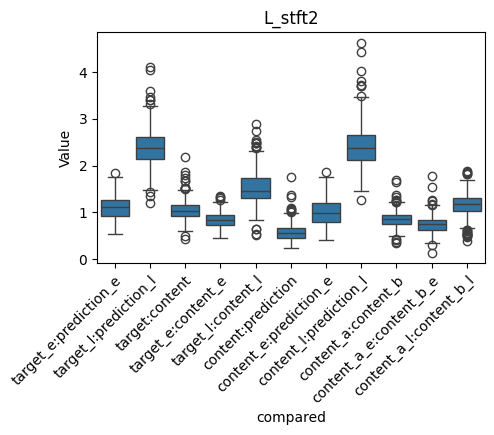

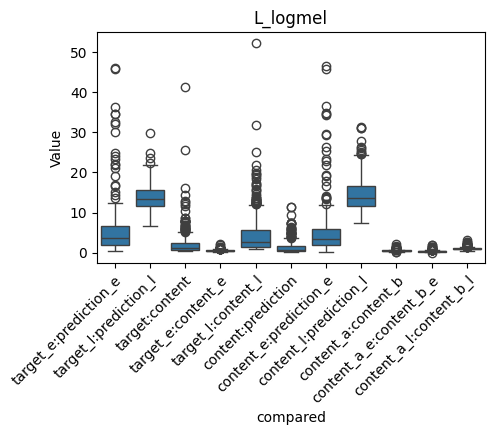

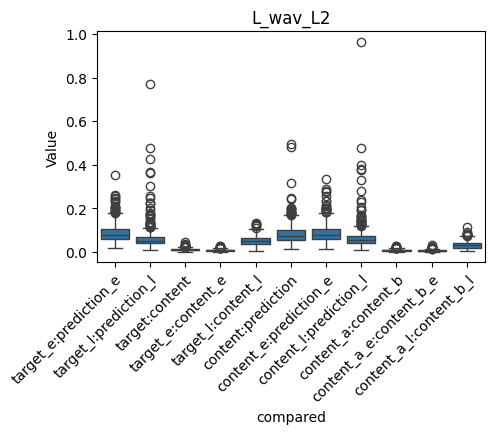

In [7]:
# Reshape DataFrame to have 'compared' and 'loss' columns
df_melted = df_losses.melt(id_vars=['compared'], value_vars=[col for col in df_losses.columns if col.startswith('L_')], var_name='Loss', value_name='Value')
df_melted.head(10)


df_melted=df_melted[~df_melted['compared'].str.contains("target:prediction")]
# Plot boxplot
plt.figure(figsize=(5, 3))
sns.boxplot(data=df_melted[df_melted["Loss"]=="L_stft2"], x='compared', y='Value')
plt.xticks(rotation=45,ha="right",rotation_mode="anchor")  
plt.title("L_stft2")

plt.figure(figsize=(5, 3))
sns.boxplot(data=df_melted[df_melted["Loss"]=="L_logmel"], x='compared', y='Value')
plt.xticks(rotation=45,ha="right",rotation_mode="anchor")  
plt.title("L_logmel")

plt.figure(figsize=(5, 3))
sns.boxplot(data=df_melted[df_melted["Loss"]=="L_wav_L2"], x='compared', y='Value')
plt.xticks(rotation=45,ha="right",rotation_mode="anchor")  
plt.title("L_wav_L2")

# plt.figure(figsize=(5, 3))
# sns.boxplot(data=df_melted[df_melted["Loss"]=="L_si_sdr"], x='compared', y='Value')
# plt.xticks(rotation=45,ha="right",rotation_mode="anchor")  
# plt.title("L_si_sdr")

# plt.figure(figsize=(5, 3))
# sns.boxplot(data=df_melted[df_melted["Loss"]=="L_srmr"], x='compared', y='Value')
# plt.xticks(rotation=45,ha="right",rotation_mode="anchor")  
# plt.title("L_srmr")

# plt.figure(figsize=(5, 3))
# sns.boxplot(data=df_melted[df_melted["Loss"]=="L_emb_cosine"], x='compared', y='Value')
# plt.xticks(rotation=45,ha="right",rotation_mode="anchor")  
# plt.title("L_emb_cosine")

# plt.figure(figsize=(5, 3))
# sns.boxplot(data=df_melted[df_melted["Loss"]=="L_emb_euc"], x='compared', y='Value')
# plt.xticks(rotation=45,ha="right",rotation_mode="anchor")  
# plt.title("L_emb_euc")


# plt.show()

In [8]:
# import ast 

# # Function to convert tensor string to float
# def tensor_to_float(tensor_str):
#     return float(ast.literal_eval(tensor_str.split('(')[1].split(')')[0]))

# # Apply the function to the desired column(s)
# columns_to_convert = ['L_stft1', 'L_stft2',"L_logmel", "L_wav_L2","L_si_sdr","L_srmr","L_emb_cosine","L_emb_euc" ]  # Add other columns here if needed
# for column in columns_to_convert:
#     df_losses[column] = df_losses[column].apply(tensor_to_float)

# df_losses.to_csv("/home/ubuntu/Data/RESULTS-reverb-match-cond-u-net/runs-exp-26-01-2024/all_losses_new.csv", index=False)


In [23]:
# df_losses[df_losses["compared"=="target:content"]]

KeyError: False

In [16]:
losstype="L_wav_L2"



def compute_and_plot_rocs(losstype, df_losses):
    # full reverb signal:
    data_diff_rooms=df_losses[df_losses["compared"]=="target:content"][losstype].tolist()
    data_same_rooms=df_losses[df_losses["compared"]=="content_a:content_b"][losstype].tolist()
    # early reflections
    data_diff_rooms_e=df_losses[df_losses["compared"]=="target_e:content_e"][losstype].tolist()
    data_same_rooms_e=df_losses[df_losses["compared"]=="content_a_e:content_b_e"][losstype].tolist()
    # late reverb
    data_diff_rooms_l=df_losses[df_losses["compared"]=="target_l:content_l"][losstype].tolist()
    data_same_rooms_l=df_losses[df_losses["compared"]=="content_a_l:content_b_l"][losstype].tolist()

    # Plot distribu
    plt.figure(figsize=(8,2))
    plt.subplot(1,3,1)
    plt.hist(data_diff_rooms, alpha=0.5,bins=100,label="RIR_room1:RIR_room2",density=True) 
    plt.hist(data_same_rooms, alpha=0.5,bins=100,label="RIR_room1_a:RIR_room1_b",density=True)
    plt.title("Full signal")
    plt.subplot(1,3,2)
    plt.hist(data_diff_rooms_e, alpha=0.5,bins=100,label="RIR_room1:RIR_room2",density=True)
    plt.hist(data_same_rooms_e, alpha=0.5,bins=100,label="RIR_room1_a:RIR_room1_b",density=True)
    plt.title("Early reflections")
    plt.subplot(1,3,3)
    plt.hist(data_diff_rooms_l, alpha=0.5,bins=100,label="RIR_room1:RIR_room2",density=True)
    plt.hist(data_same_rooms_l, alpha=0.5,bins=100,label="RIR_room1_a:RIR_room1_b",density=True)
    plt.title("Late reverb")
    plt.legend()
    plt.show()

    # Compute ROC to see if the network is able to distinguish between two enviromnents
    import sklearn.metrics as metrics
    binary_labels=[0 for i in range(len(data_same_rooms))] + [1 for i in range(len(data_diff_rooms))]
    vals=data_same_rooms+data_diff_rooms
    vals_e=data_same_rooms_e+data_diff_rooms_e
    vals_l=data_same_rooms_l+data_diff_rooms_l

    fpr, tpr, thresholds = metrics.roc_curve(binary_labels,vals)
    fpr_e, tpr_e, thresholds_e = metrics.roc_curve(binary_labels,vals_e)
    fpr_l, tpr_l, thresholds_l = metrics.roc_curve(binary_labels,vals_l)
    roc_auc = metrics.auc(fpr, tpr)
    roc_auc_e = metrics.auc(fpr_e, tpr_e)
    roc_auc_l = metrics.auc(fpr_l, tpr_l)
    plt.figure()
    plt.plot(fpr,tpr,label=f"reverberant signal, AUC={roc_auc:.2f}")
    plt.plot(fpr_e,tpr_e,label=f"early reflections, AUC={roc_auc_e:.2f}")
    plt.plot(fpr_l,tpr_l,label=f"late reverb, AUC={roc_auc_l:.2f}")
    plt.title(f'Detection of a difference in acoustic environment \n Based on loss={losstype}')
    plt.legend()
    plt.show()
    plt.figure()
    plt.plot(thresholds,label=f"reverberant signal, AUC={roc_auc:.2f}")
    plt.plot(thresholds_e,label=f"early reflections, AUC={roc_auc_e:.2f}")
    plt.plot(thresholds_l,label=f"late reverb, AUC={roc_auc_l:.2f}")
    plt.title(f'Thresholds\n Based on loss={losstype}')
    plt.legend()
    plt.show()

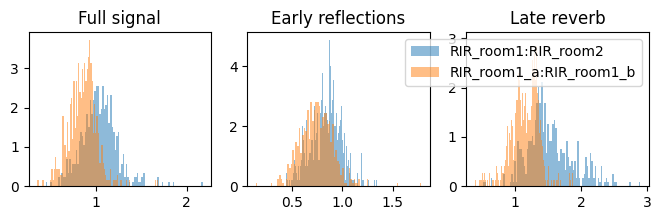

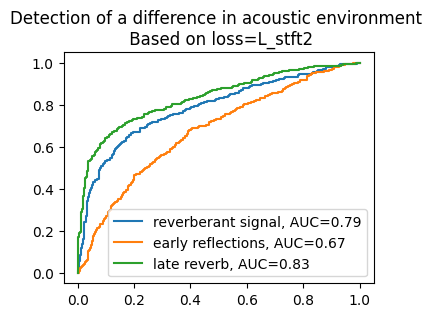

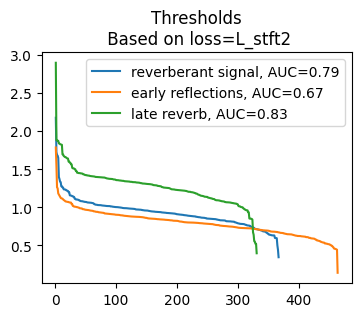

In [17]:
compute_and_plot_rocs("L_stft2", df_losses)

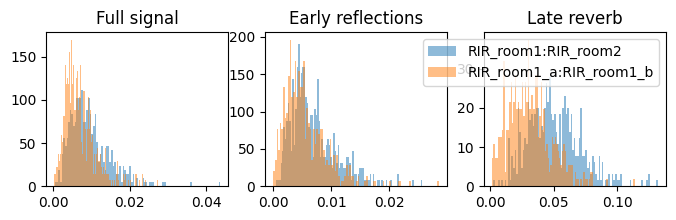

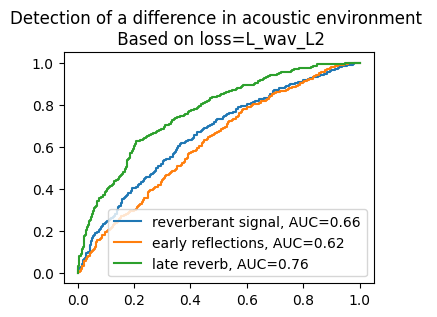

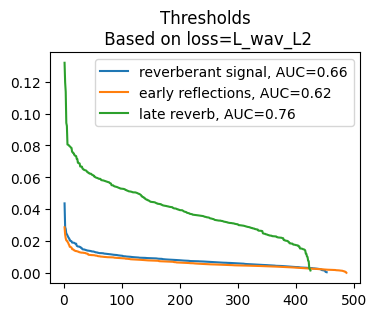

In [18]:
compute_and_plot_rocs("L_wav_L2", df_losses)

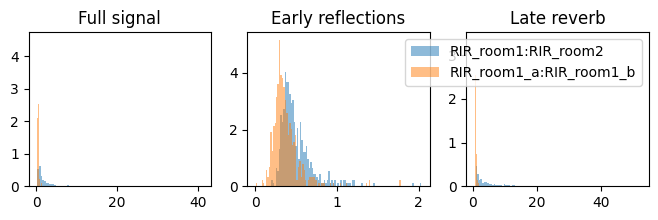

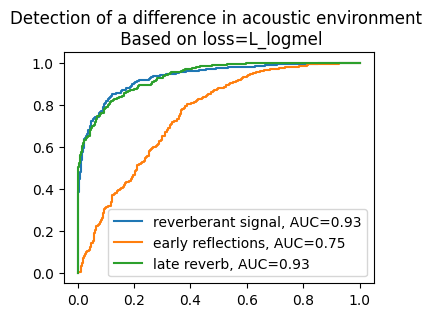

In [12]:
compute_and_plot_rocs("L_logmel", df_losses)

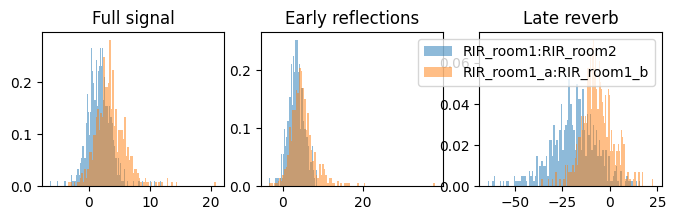

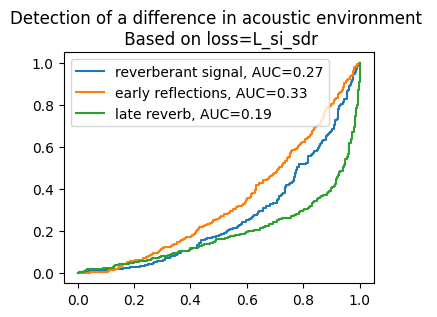

In [14]:
compute_and_plot_rocs("L_si_sdr", df_losses)